In [1]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt

# Data

### Level-0

Let's print the first 10 lines of the original .cor file. We assume that the column "WindF" delivers the windspeed.

In [2]:
file_path = "example_files/SA2024090806_1.cor"

# Open the file and read all lines
with open(file_path, "r") as file:
    lines = file.readlines()

# Print the first 10 lines for inspection
for line in lines[:10]:
    print(line.strip())

# Parse the file and split into structured data
data = []
for line in lines:
    split_line = line.strip().split()
    data.append(split_line)

Time	Altitude	Latitude	Longitude	VE	VN	Ascent	WindF	WindD	DP	T	U	Press	Flag
016331	+00054.00	+00.292029	-00.400296	-00.02	-00.02	+00.09	+04.00	033.9	+20.66	+24.60	+082.7	+1006.8	0
016332	+00055.75	+00.292029	-00.400296	+02.47	-00.96	+01.48	+05.15	039.7	+20.56	+23.90	+081.6	+1006.8	1
016333	+00057.51	+00.292028	-00.400296	-02.33	-00.55	+03.94	+05.17	039.7	+20.57	+23.88	+081.8	+1006.4	0
016334	+00061.56	+00.292028	-00.400297	-04.00	-07.31	+02.91	+05.20	039.8	+20.68	+23.96	+081.9	+1005.9	0
016335	+00066.12	+00.292027	-00.400297	-01.97	-07.13	+06.69	+05.22	039.9	+20.73	+23.99	+082.0	+1005.4	0
016336	+00070.18	+00.292026	-00.400297	+01.59	-03.03	+03.85	+05.25	039.8	+20.72	+23.96	+082.1	+1004.9	0
016337	+00073.73	+00.292026	-00.400297	-00.63	-00.80	+05.69	+05.29	039.6	+20.71	+23.94	+082.1	+1004.5	0
016338	+00078.80	+00.292025	-00.400298	-02.71	-03.50	+05.65	+05.33	039.4	+20.72	+23.94	+082.2	+1004.0	0
016339	+00083.88	+00.292024	-00.400298	-07.03	-06.15	+03.29	+05.36	039.2	+20.74	+23.94	+082.

In [3]:
first_altitude_row = data[1] 
windf_value = first_altitude_row[data[0].index("WindF")]

print(f"First value of 'WindF' at the first altitude level: {windf_value} m/s.")

First value of 'WindF' at the first altitude level: +04.00 m/s.


### Level-1

In [4]:
maestro_level1 = xr.open_dataset("example_files/MAESTRO_SAL_CNRM_RS-ascent_L0_20240908-0432_V1.nc")
pySonde_level1 = xr.open_dataset("example_files/RS_ORCESTRA_SAL_L1_20240908T0432_ascent.nc").isel(sounding=0)

### Level2

In [5]:
pySonde_level2 = xr.open_dataset("example_files/RS_ORCESTRA_SAL_L2_20240908T0432_ascent.nc").isel(sounding=0)

# Plotting

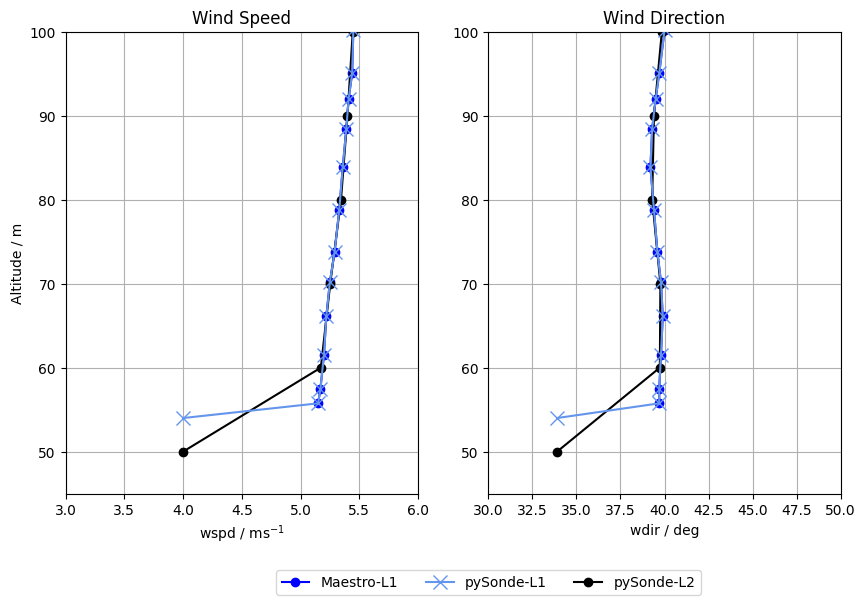

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.plot(maestro_level1.windSpeed, maestro_level1.altitude, color='blue', marker='o', label='Maestro-L1')
ax1.plot(pySonde_level1.wspd, pySonde_level1.alt, color='cornflowerblue', marker='x', ms=10, zorder=10, label='pySonde-L1')
ax1.plot(pySonde_level2.wspd, pySonde_level2.alt, color='black', marker='o', label='pySonde-L2')

ax1.set_ylabel('Altitude / m')
ax1.set_xlabel(r'wspd / ms$^{-1}$')
ax1.set_xlim(3, 6)
ax1.set_ylim(45, 100)
ax1.set_title("Wind Speed")
ax1.grid()


ax2.plot(maestro_level1.windDirection, maestro_level1.altitude, color='blue', marker='o', label='Maestro-L1')
ax2.plot(pySonde_level1.wdir, pySonde_level1.alt, color='cornflowerblue', marker='x', ms=10, zorder=10, label='pySonde-L1')
ax2.plot(pySonde_level2.wdir, pySonde_level2.alt, color='black', marker='o', label='pySonde-L2')

ax2.set_xlabel(r'wdir / deg')
ax2.set_xlim(30, 50)
ax2.set_ylim(45, 100)
ax2.set_title("Wind Direction")
ax2.grid()

ax2.legend(loc="upper center", bbox_to_anchor=(0, -0.15), ncol=3)

plt.savefig("meastro_vs_pysonde_processing.png")
plt.show()